In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
location = "credit_card.csv"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE_FREQUENCY', ylabel='count'>

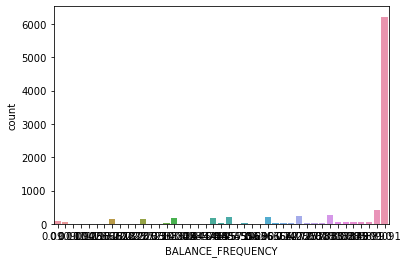

In [9]:
sns.countplot(df['BALANCE_FREQUENCY'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PURCHASES', ylabel='Density'>

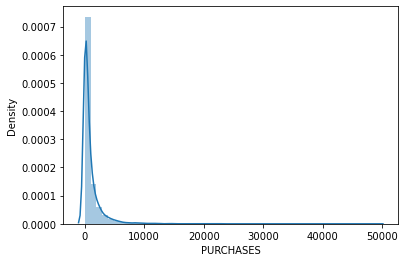

In [10]:
sns.distplot(df['PURCHASES'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

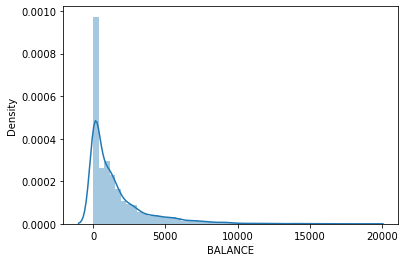

In [11]:
sns.distplot(df['BALANCE'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='Density'>

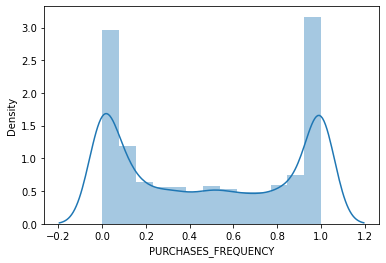

In [12]:
sns.distplot(df['PURCHASES_FREQUENCY'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='count'>

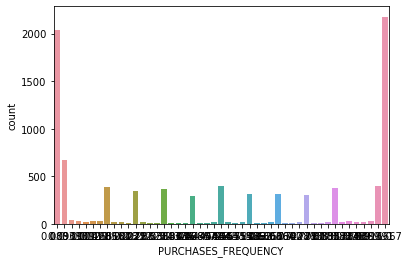

In [13]:
sns.countplot(df['PURCHASES_FREQUENCY'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

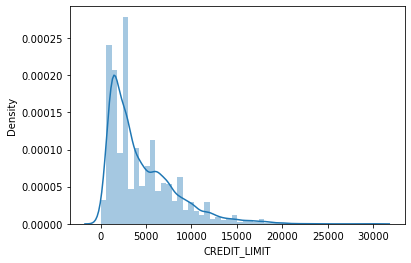

In [14]:
sns.distplot(df['CREDIT_LIMIT'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

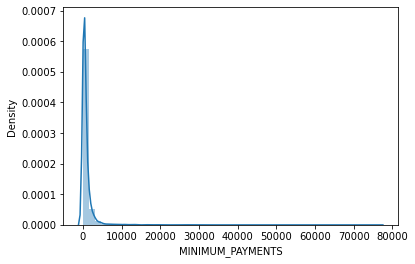

In [15]:
sns.distplot(df['MINIMUM_PAYMENTS'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TENURE', ylabel='Density'>

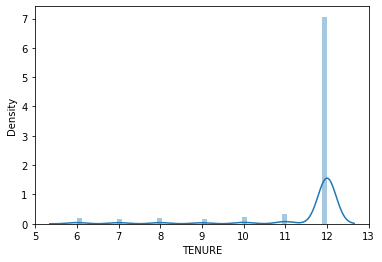

In [16]:
sns.distplot(df['TENURE'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TENURE', ylabel='count'>

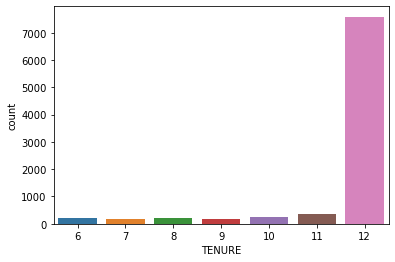

In [17]:
sns.countplot(df['TENURE'])

In [18]:
pd.pivot_table(data=df, index='TENURE', values='BALANCE')

,BALANCE
TENURE,
6,1095.890702
7,1003.800362
8,1127.963470
9,1098.752149
10,1251.955773
11,1641.770893
12,1619.158166


In [19]:
pd.pivot_table(data=df, index='PURCHASES_FREQUENCY', values='BALANCE')

,BALANCE
PURCHASES_FREQUENCY,
0.000000,2152.064324
0.083333,1274.774027
0.090909,1946.081711
0.100000,1064.932516
0.111111,811.298332
0.125000,1168.976222
0.142857,648.643737
0.166667,1378.220628
0.181818,1302.939147


In [ ]:
sns.pairplot(data=df, hue="TENURE")

In [21]:
X = df[['TENURE', 'BALANCE', 'PURCHASES_FREQUENCY']]
X.head()

,TENURE,BALANCE,PURCHASES_FREQUENCY
0,12,40.900749,0.166667
1,12,3202.467416,0.000000
2,12,2495.148862,1.000000
3,12,1666.670542,0.083333
4,12,817.714335,0.083333


In [22]:
kmeans = KMeans(n_clusters=5)

In [23]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [24]:
len(df)

8950

In [25]:
kmeans.cluster_centers_

array([[1.14289630e+01, 2.22851182e+02, 5.57405028e-01],
       [1.16803954e+01, 6.10560337e+03, 4.22074105e-01],
       [1.15361217e+01, 1.44364424e+03, 4.14874259e-01],
       [1.16706081e+01, 3.32149238e+03, 4.39172480e-01],
       [1.18940397e+01, 1.05355938e+04, 5.36554285e-01]])

In [26]:
df['cluster'] = kmeans.labels_
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


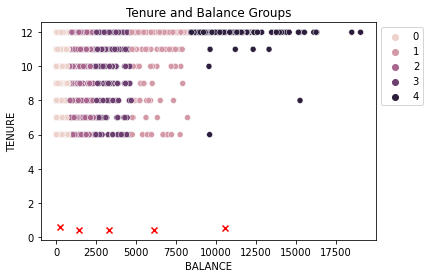

In [29]:

sns.scatterplot(data=df, x='BALANCE', y='TENURE', hue='cluster')


plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Tenure and Balance Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

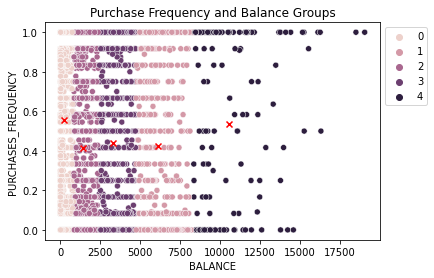

In [30]:

sns.scatterplot(data=df, x='BALANCE', y='PURCHASES_FREQUENCY', hue='cluster')


plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Purchase Frequency and Balance Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

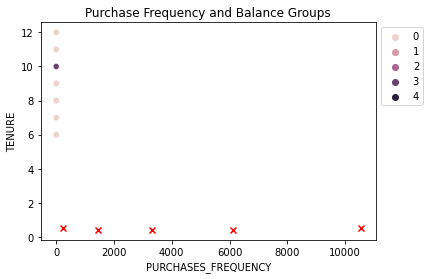

In [31]:

sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='TENURE', hue='cluster')


plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Purchase Frequency and Balance Groups")

plt.legend(bbox_to_anchor=(1,1), loc=2)

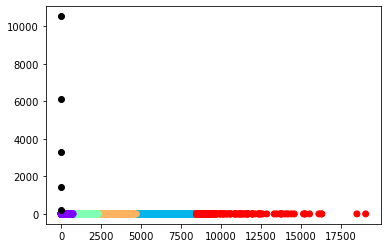

In [32]:
plt.scatter(df['BALANCE'],df['PURCHASES_FREQUENCY'], c=df['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [33]:
client = [32, 75, 68]

client_group = kmeans.predict([client])

print(f"Cluster assignment: {client_group}")

Cluster assignment: [0]


In [39]:
client = [12, 1000, 268]

client_group = kmeans.predict([client])

print(f"Cluster assignment: {client_group}")

Cluster assignment: [2]
